In [1]:
from octnet import OCTnet

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Get paths to data

In [2]:
data = {"train": "dataset/OCT2017/train/", 
        "test": "dataset/OCT2017/test/"}

imgs_path = {"train": [], 
             "test": []}

classes = ['DRUSEN', 'CNV', 'DME', 'NORMAL']

for cls_name in classes:
    for key in data:
        for name in os.listdir(os.path.join(data[key], cls_name)):
            if not name.startswith("."):
                imgs_path[key].append(os.path.join(data[key], cls_name, name))

## Squeezenet1_1

In [3]:
net = OCTnet("squeezenet1_1", "checkpoints/squeezenet_accuracy_99.700.pth")

## Inference

In [4]:
val_imgs = [cv2.imread(path) for path in imgs_path["test"]]
val_classes = [path.split("/")[-2] for path in imgs_path["test"]]
val_classes_cat = [classes.index(cl) for cl in val_classes]

In [5]:
predicts = net(val_imgs)
predicts_cat = [classes.index(cl) for cl in predicts]

## Visualize

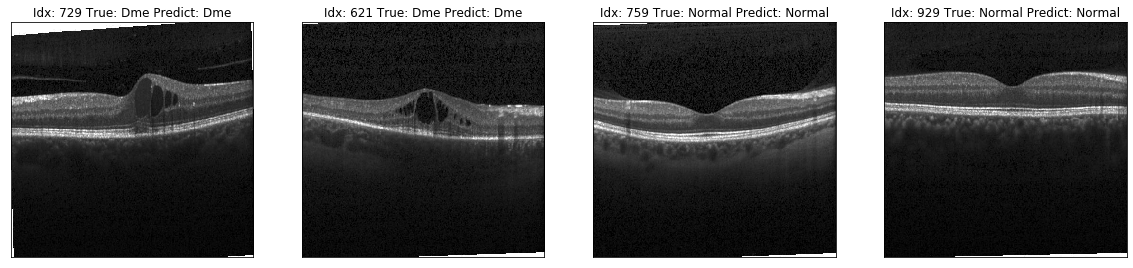

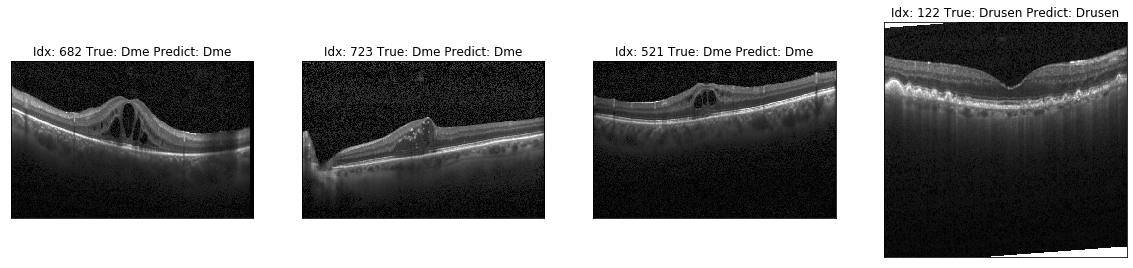

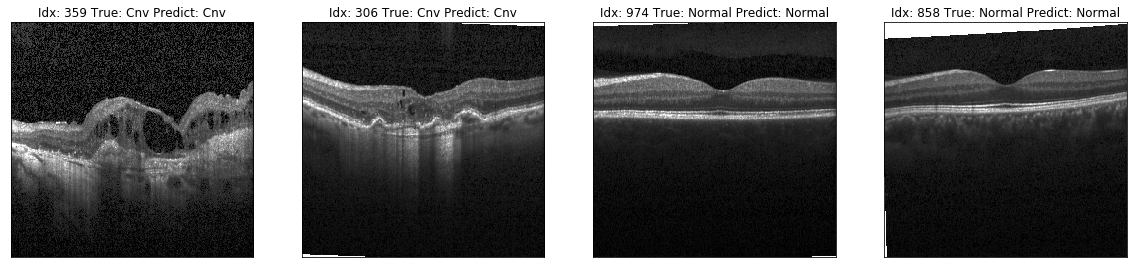

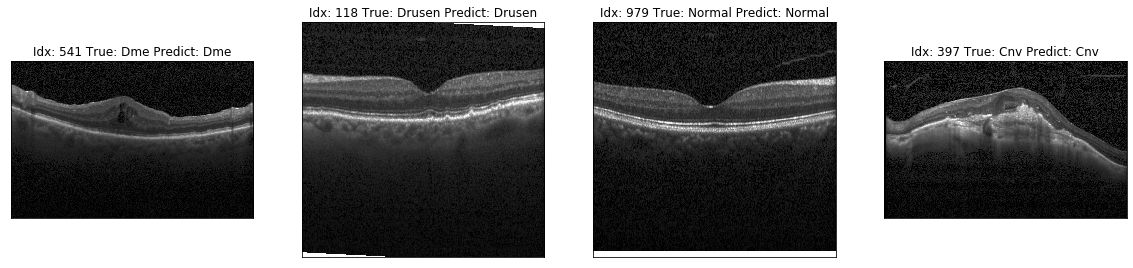

In [7]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(20, 9))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

for_print = {}
for idx in np.random.randint(len(val_imgs), size=16):
    img = val_imgs[idx]
    label = val_classes[idx]
    pred = predicts[idx]
    for_print[f"Idx: {idx} True: {label} Predict: {pred}"] = img[..., ::-1]
    if len(for_print) != 0 and (len(for_print) % 4) == 0:
        visualize(**for_print)
        for_print = {}

## Eval

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(unique_labels(y_true, y_pred))
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[0 1 2 3]
Confusion matrix, without normalization
[[250   0   0   0]
 [  0 250   0   0]
 [  0   1 249   0]
 [  2   0   0 248]]


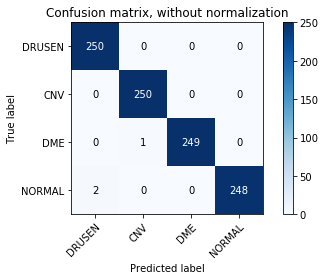

In [9]:
plot_confusion_matrix(np.array(val_classes_cat), np.array(predicts_cat), np.array(list(classes)))

In [10]:
print(classification_report(np.array(val_classes_cat), np.array(predicts_cat), target_names=classes))

              precision    recall  f1-score   support

      DRUSEN       0.99      1.00      1.00       250
         CNV       1.00      1.00      1.00       250
         DME       1.00      1.00      1.00       250
      NORMAL       1.00      0.99      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## DenseNet121

In [11]:
net = OCTnet("densenet121", "checkpoints/densenet121_accuracy_99.300.pth")

In [12]:
predicts = net(val_imgs)
predicts_cat = [classes.index(cl) for cl in predicts]

[0 1 2 3]
Confusion matrix, without normalization
[[248   2   0   0]
 [  0 249   1   0]
 [  1   2 247   0]
 [  1   0   0 249]]


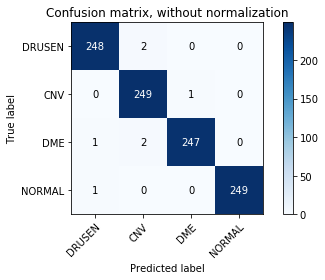

In [13]:
plot_confusion_matrix(np.array(val_classes_cat), np.array(predicts_cat), np.array(list(classes)))

In [14]:
print(classification_report(np.array(val_classes_cat), np.array(predicts_cat), target_names=classes))

              precision    recall  f1-score   support

      DRUSEN       0.99      0.99      0.99       250
         CNV       0.98      1.00      0.99       250
         DME       1.00      0.99      0.99       250
      NORMAL       1.00      1.00      1.00       250

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## VGG16 with batchnorm layers

In [15]:
net = OCTnet("vgg16_bn", "checkpoints/vgg16_bn_accuracy_99.300.pth")

In [16]:
predicts = net(val_imgs)
predicts_cat = [classes.index(cl) for cl in predicts]

[0 1 2 3]
Confusion matrix, without normalization
[[249   1   0   0]
 [  2 248   0   0]
 [  0   3 247   0]
 [  1   0   0 249]]


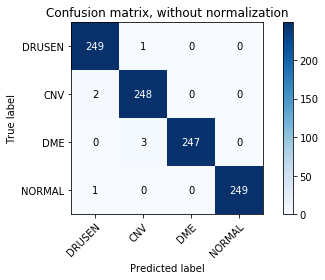

In [17]:
plot_confusion_matrix(np.array(val_classes_cat), np.array(predicts_cat), np.array(list(classes)))

In [18]:
print(classification_report(np.array(val_classes_cat), np.array(predicts_cat), target_names=classes))

              precision    recall  f1-score   support

      DRUSEN       0.99      1.00      0.99       250
         CNV       0.98      0.99      0.99       250
         DME       1.00      0.99      0.99       250
      NORMAL       1.00      1.00      1.00       250

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

